In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '443f4a1e-41aa-4a52-8b7a-ebf87eeafca8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-02T06:38:36.335Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 10309}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10261, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.941753e+07,1.941753e+07,False,NaN,1,NaN,NaN,None,2023-07-02T06:37:00.000Z,30504.457481,8.609204e+09,-63.4702,0.016113,0.328405,-1.411950,12.378626,6.717635,9.969009,5.923212e+11,49.5662,6.405936e+11,None,2023-07-02T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 06:38:42.905173+00:00
1,1027,Ethereum,ETH,ethereum,7047,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202188e+08,1.202188e+08,True,NaN,2,NaN,NaN,None,2023-07-02T06:37:00.000Z,1914.787691,4.496769e+09,-63.6962,0.035453,-0.100165,-0.669909,1.226349,2.659409,7.387548,2.301934e+11,19.2624,2.301934e+11,None,2023-07-02T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 06:38:42.905173+00:00
2,825,Tether,USDT,tether,56068,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.334171e+10,8.573353e+10,True,NaN,3,NaN,NaN,None,2023-07-02T06:37:00.000Z,1.000066,1.844431e+10,-55.1734,0.004699,0.024729,-0.020848,-0.010257,-0.033013,-0.005868,8.334723e+10,6.9740,8.573921e+10,None,2023-07-02T06:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-02 06:38:42.905173+00:00
3,1839,BNB,BNB,bnb,1473,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558511e+08,1.558511e+08,False,NaN,4,NaN,NaN,None,2023-07-02T06:37:00.000Z,244.909664,5.809421e+08,-8.4157,-0.027746,1.574024,1.782228,-20.568175,-24.257691,-20.842351,3.816944e+10,3.1936,3.816944e+10,None,2023-07-02T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 06:38:42.905173+00:00
4,3408,USD Coin,USDC,usd-coin,13161,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.739582e+10,2.739582e+10,False,NaN,5,NaN,NaN,None,2023-07-02T06:37:00.000Z,1.000080,2.197491e+09,-63.3535,0.000655,0.016409,0.012917,0.017523,0.008707,0.030885,2.739802e+10,2.2923,2.739802e+10,None,2023-07-02T06:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-02 06:38:42.905173+00:00
5,52,XRP,XRP,xrp,970,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,None,2023-07-02T06:37:00.000Z,0.483892,9.500414e+08,-27.2912,-0.065215,3.319355,-1.585219,-6.427326,5.214850,-5.099071,2.528545e+10,2.1155,4.838923e+10,None,2023-07-02T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 06:38:42.905173+00:00
6,2010,Cardano,ADA,cardano,846,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.494696e+10,3.593697e+10,False,NaN,7,NaN,NaN,None,2023-07-02T06:37:00.000Z,0.289928,2.138400e+08,-56.6927,0.208870,1.891410,-2.691744,-22.116051,-25.066190,-24.999177,1.013211e+10,0.8478,1.304677e+10,None,2023-07-02T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 06:38:42.905173+00:00
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.400036e+11,1.400036e+11,True,NaN,8,NaN,NaN,None,2023-07-02T06:37:00.000Z,0.067267,3.620390e+08,-53.9869,0.271184,-1.082510,-0.917583,-6.743712,-14.321580,-13.950280,9.417638e+09,0.7881,9.417638e+09,None,2023-07-02T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 06:38:42.905173+00:00
8,2,Litecoin,LTC,litecoin,930,2013-04-28T00:00:00.000Z,"[mineabl

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '443f4a1e-41aa-4a52-8b7a-ebf87eeafca8',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df

  
    if not os.path.isfile(r'C:\Users\chcav\Documents\PandasTutorial\API.csv'):
        df.to_csv(r'C:\Users\chcav\Documents\PandasTutorial\API.csv', header='column_names')
    
    else:
        df.to_csv(r'C:\Users\chcav\Documents\PandasTutorial\API.csv', mode='a', header=False)
        
    
    #Then to read in the file: 
    
    df = pd.read_csv(r'C:\Users\chcav\Documents\PandasTutorial\API.csv')


In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.00294,0.40322,-1.18164,12.50376,6.95371,10.13071
Ethereum,-0.01461,-0.05009,0.13353,1.20940,2.65054,7.54907
Tether,0.00342,0.02234,-0.03343,-0.01659,-0.03325,0.00431
BNB,0.21842,1.49621,2.20477,-20.61881,-24.48318,-21.09507
USD Coin,0.00405,0.00406,0.01622,0.00857,0.01953,0.05374
XRP,-0.83314,3.51743,-1.17474,-6.45026,5.39987,-5.17128
Cardano,-0.08762,1.99519,-2.41974,-22.37057,-25.15219,-24.04739
Dogecoin,0.08799,-2.42030,-0.89381,-7.03963,-14.47478,-13.65156
Solana,1.08625,5.93556,11.80297,-9.26846,-12.90144,-5.08430


In [12]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.00294
                 quote.USD.percent_change_24h     0.40322
                 quote.USD.percent_change_7d     -1.18164
                 quote.USD.percent_change_30d    12.50376
                 quote.USD.percent_change_60d     6.95371
                 quote.USD.percent_change_90d    10.13071
Ethereum         quote.USD.percent_change_1h     -0.01461
                 quote.USD.percent_change_24h    -0.05009
                 quote.USD.percent_change_7d      0.13353
                 quote.USD.percent_change_30d     1.20940
                 quote.USD.percent_change_60d     2.65054
                 quote.USD.percent_change_90d     7.54907
Tether           quote.USD.percent_change_1h      0.00342
                 quote.USD.percent_change_24h     0.02234
                 quote.USD.percent_change_7d     -0.03343
                 quote.USD.percent_change_30d    -0.01659
                 quote.USD

In [14]:
df5 = df4.to_frame(name='values')

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.00294
                quote.USD.percent_change_24h   0.40322
                quote.USD.percent_change_7d   -1.18164
                quote.USD.percent_change_30d  12.50376
                quote.USD.percent_change_60d   6.95371
                quote.USD.percent_change_90d  10.13071
Ethereum        quote.USD.percent_change_1h   -0.01461
                quote.USD.percent_change_24h  -0.05009
                quote.USD.percent_change_7d    0.13353
                quote.USD.percent_change_30d   1.20940
                quote.USD.percent_change_60d   2.65054
                quote.USD.percent_change_90d   7.54907
Tether          quote.USD.percent_change_1h    0.00342
                quote.USD.percent_change_24h   0.02234
                quote.USD.percent_change_7d   -0.03343
                quote.USD.percent_change_30d  -0.01659
                quote.USD.percent_change_60d  -0.03325
                quote.USD.percent_change_90d   0.00431
BNB             quote.USD.percent_change_1h    0.21842
                quote.USD.percent_change_24h   1.49621
                quote.USD.percent_change_7d    2.20477
                quote.USD.percent_change_30d -20.61881
                quote.USD.percent_change_60d -24.48318
                quote.USD.percent_change_90d -21.09507
USD Coin        quote.USD.percent_change_1h    0.00405
                quote.USD.percent_change_24h   0.00406
                quote.USD.percent_change_7d    0.01622
                quote.USD.percent_change_30d   0.00857
                quote.USD.percent_change_60d   0.01953
                quote.USD.percent_change_90d   0.05374
XRP             quote.USD.percent_change_1h   -0.83314
                quote.USD.percent_change_24h   3.51743
                quote.USD.percent_change_7d   -1.17474
                quote.USD.percent_change_30d  -6.45026
                quote.USD.percent_change_60d   5.39987
                quote.USD.percent_change_90d  -5.17128
Cardano         quote.USD.percent_change_1h   -0.08762
                quote.USD.percent_change_24h   1.99519
                quote.USD.percent_change_7d   -2.41974
                quote.USD.percent_change_30d -22.37057
                quote.USD.percent_change_60d -25.15219
                quote.USD.percent_change_90d -24.04739
Dogecoin        quote.USD.percent_change_1h    0.08799
                quote.USD.percent_change_24h  -2.42030
                quote.USD.percent_change_7d   -0.89381
                quote.USD.percent_change_30d  -7.03963
                quote.USD.percent_change_60d -14.47478
                quote.USD.percent_change_90d -13.65156
Solana          quote.USD.percent_change_1h    1.08625
                quote.USD.percent_change_24h   5.93556
                quote.USD.percent_change_7d   11.80297
                quote.USD.percent_change_30d  -9.26846
                quote.USD.percent_change_60d -12.90144
                quote.USD.percent_change_90d  -5.08430
TRON            quote.USD.percent_change_1h   -0.56554
                quote.USD.percent_change_24h  -0.68590
                quote.USD.percent_change_7d    3.84792
                quote.USD.percent_change_30d  -0.67365
                quote.USD.percent_change_60d   9.45981
                quote.USD.percent_change_90d  15.91753
Litecoin        quote.USD.percent_change_1h    1.98835
                quote.USD.percent_change_24h   2.90067
                quote.USD.percent_change_7d   21.15946
                quote.USD.percent_change_30d  14.34206
                quote.USD.percent_change_60d  23.92154
                quote.USD.percent_change_90d  19.55962
Polkadot        quote.USD.percent_change_1h    0.08281
                quote.USD.percent_change_24h   1.91307
                quote.USD.percent_change_7d    2.64862
                quote.USD.percent_change_30d  -0.35216
                quote.USD.percent_change_60d  -7.38880
                quote.USD.percent

In [15]:
df5.count()

values    96
dtype: int64

In [ ]:
index = pd.Index(range(96))

In [ ]:
#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

In [19]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00294
1,Bitcoin,quote.USD.percent_change_24h,0.40322
2,Bitcoin,quote.USD.percent_change_7d,-1.18164
3,Bitcoin,quote.USD.percent_change_30d,12.50376
4,Bitcoin,quote.USD.percent_change_60d,6.95371
5,Bitcoin,quote.USD.percent_change_90d,10.13071
6,Ethereum,quote.USD.percent_change_1h,-0.01461
7,Ethereum,quote.USD.percent_change_24h,-0.05009
8,Ethereum,quote.USD.percent_change_7d,0.13353
9,Ethereum,quote.USD.percent_change_30d,1.20940


In [20]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h' ,'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.00294
1,Bitcoin,24h,0.40322
2,Bitcoin,7d,-1.18164
3,Bitcoin,30d,12.50376
4,Bitcoin,60d,6.95371
5,Bitcoin,90d,10.13071
6,Ethereum,1h,-0.01461
7,Ethereum,24h,-0.05009
8,Ethereum,7d,0.13353
9,Ethereum,30d,1.20940


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

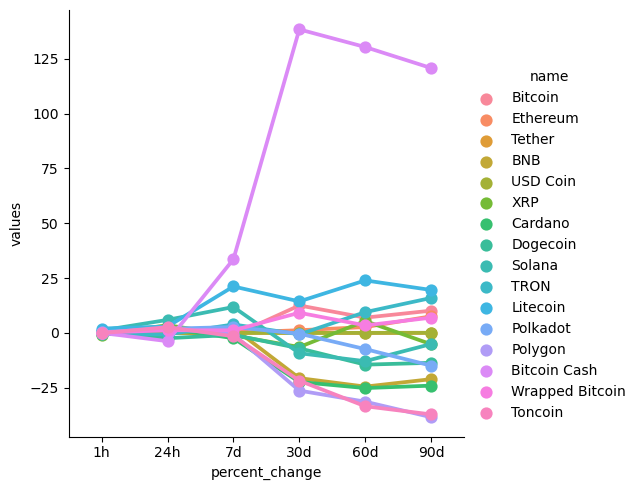

In [22]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

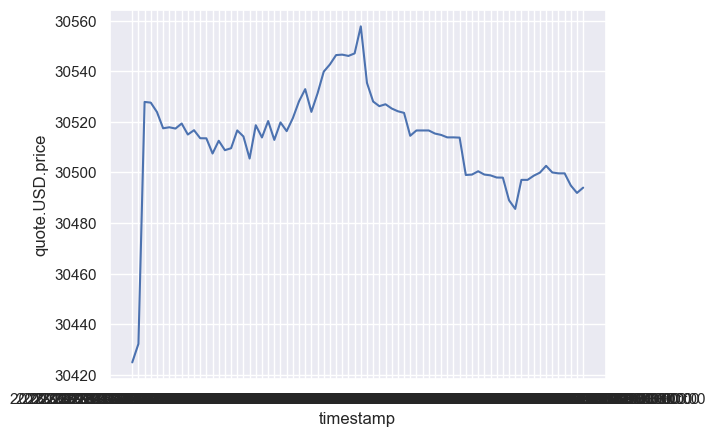

In [25]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)